## Lab 5: Data Cleaning and Visualization

**Release Date: Thursday February 27**

**Due Date: Tuesday Feb 25, 2020 at 12PM**

In this lab, we will be working with data from the New York City Police Department. Following the discussion in lecture, we will be studying reports of crime. The data is a subset of the records maintained by the police. See [here](https://data.cityofnewyork.us/Public-Safety/NYC-crime/qb7u-rbmr) for more information. 

#### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** in the following cell:

**Name** Richie Doherty

**Names of Collaborators** Madi Perez

## Setup

After importing matplotlib, we use the command `%matplotlib inline` to display figures in the notebook. Note that we can configure many aspects of [matplotlib](https://matplotlib.org/users/customizing.html) such as the default figure size.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 9)

# Part 1: Cleaning and Exploring the Data


Let's now load the CSV files we have into a `pandas.DataFrame` object. Here we load both the dataset and a description of the dataset. 

In [3]:
home = os.environ['HOME']
data_dir = f"{home}/shared" 
file_path = f"{data_dir}/NYC_Complaint_Data_partial.csv"
file_description_path = f"{data_dir}/Crime_Column_Description.csv"

calls = pd.read_csv(file_path)
calls_description = pd.read_csv(file_description_path)

calls_description

,Column,Description
0,CMPLNT_NUM,Randomly generated persistent ID for each comp...
1,CMPLNT_FR_DT,Exact date of occurrence for the reported even...
2,CMPLNT_FR_TM,Exact time of occurrence for the reported even...
3,CMPLNT_TO_DT,Ending date of occurrence for the reported eve...
4,CMPLNT_TO_TM,Ending time of occurrence for the reported eve...
5,RPT_DT,Date event was reported to police
6,KY_CD,Three digit offense classification code
7,OFNS_DESC,Description of offense corresponding with key ...
8,PD_CD,Three digit internal classification code (more...
9,PD_DESC,Description of internal classification corresp...


We see that the fields include a 

- complaint number 'CMPLNT_NUM'
- the offense type 'OFNS_DESC'
- the date and time of the offense 'CMPLNT_FR_DT'& 'CMPLNT_FR_TM'
- the "PD_DESC" related to the offense type
- "RPT_DT" a date added to the database
- the location spread across four fields 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude'.

Let's also check some basic information about these files using the `DataFrame.describe` and `DataFrame.info` methods.

In [4]:
calls.info()
calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314572 entries, 0 to 314571
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLNT_NUM         314572 non-null  int64  
 1   CMPLNT_FR_DT       314552 non-null  object 
 2   CMPLNT_FR_TM       314572 non-null  object 
 3   CMPLNT_TO_DT       252725 non-null  object 
 4   CMPLNT_TO_TM       252839 non-null  object 
 5   RPT_DT             314572 non-null  object 
 6   KY_CD              314572 non-null  int64  
 7   OFNS_DESC          313678 non-null  object 
 8   PD_CD              314352 non-null  float64
 9   PD_DESC            314352 non-null  object 
 10  CRM_ATPT_CPTD_CD   314572 non-null  object 
 11  LAW_CAT_CD         314572 non-null  object 
 12  JURIS_DESC         314572 non-null  object 
 13  BORO_NM            314572 non-null  object 
 14  ADDR_PCT_CD        314572 non-null  float64
 15  LOC_OF_OCCUR_DESC  248996 non-null  object 
 16  PR

,CMPLNT_NUM,KY_CD,PD_CD,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,3.145720e+05,314572.000000,314352.000000,314572.000000,3.047530e+05,304753.000000,304753.000000,304753.000000
mean,5.497730e+08,295.155338,409.545032,63.743200,1.004962e+06,206788.180018,40.734220,-73.925235
std,2.601871e+08,150.339801,219.009954,34.308241,2.142523e+04,30443.257837,0.083563,0.077266
min,1.000010e+08,101.000000,101.000000,1.000000,9.133190e+05,121152.000000,40.498957,-74.255076
25%,3.242674e+08,117.000000,254.000000,40.000000,9.919380e+05,183893.000000,40.671360,-73.972326
50%,5.493636e+08,341.000000,357.000000,66.000000,1.004543e+06,205315.000000,40.730145,-73.926808
75%,7.758279e+08,351.000000,637.000000,94.000000,1.016506e+06,234853.000000,40.811287,-73.883509
max,9.999917e+08,881.000000,975.000000,123.000000,1.067186e+06,271820.000000,40.912723,-73.700717


Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let's explore the data further in Question 1.

Before we go over the fields to see their meanings, the cell below will verify that all the events happened in NYC by checking that the BORO_NM is not null for any row. BORO_NM also takes one of the 5 boroughs of NYC.

In [5]:
calls.BORO_NM.isna().any()

False

In [6]:
calls.BORO_NM.value_counts()

BROOKLYN         94898
MANHATTAN        73467
BRONX            68336
QUEENS           63389
STATEN ISLAND    14482
Name: BORO_NM, dtype: int64

## Question 1
Above, when we called `head`, it seemed like `OFNS_DESC` and `PD_DESC` both contained information about the type of event reported. What is the difference in meaning between the two columns? One way to probe this is to look at the `value_counts` for each Series.

In [7]:
calls['OFNS_DESC'].value_counts().head(20)

PETIT LARCENY                     54430
HARRASSMENT 2                     39853
ASSAULT 3 & RELATED OFFENSES      34345
CRIMINAL MISCHIEF & RELATED OF    30851
GRAND LARCENY                     28942
DANGEROUS DRUGS                   17070
FELONY ASSAULT                    13138
OFF. AGNST PUB ORD SENSBLTY &     13082
ROBBERY                           10970
BURGLARY                          10501
MISCELLANEOUS PENAL LAW            8698
DANGEROUS WEAPONS                  6867
OFFENSES AGAINST PUBLIC ADMINI     6431
GRAND LARCENY OF MOTOR VEHICLE     4898
INTOXICATED & IMPAIRED DRIVING     4507
VEHICLE AND TRAFFIC LAWS           3864
SEX CRIMES                         3565
FORGERY                            3330
THEFT-FRAUD                        3135
CRIMINAL TRESPASS                  3124
Name: OFNS_DESC, dtype: int64

In [8]:
calls['PD_DESC'].value_counts().head(20)

ASSAULT 3                           28049
HARASSMENT,SUBD 3,4,5               26641
LARCENY,PETIT FROM STORE-SHOPL      17592
LARCENY,PETIT FROM BUILDING,UN      14323
HARASSMENT,SUBD 1,CIVILIAN          13213
AGGRAVATED HARASSMENT 2             12916
ASSAULT 2,1,UNCLASSIFIED            10437
MISCHIEF, CRIMINAL 4, OF MOTOR       9375
LARCENY,PETIT FROM AUTO              8856
CRIMINAL MISCHIEF,UNCLASSIFIED 4     8646
MARIJUANA, POSSESSION 4 & 5          7912
CRIMINAL MISCHIEF 4TH, GRAFFIT       6709
CONTROLLED SUBSTANCE, POSSESSI       5857
CRIMINAL CONTEMPT 1                  4829
LARCENY,PETIT FROM OPEN AREAS,       4703
MENACING,UNCLASSIFIED                4482
INTOXICATED DRIVING,ALCOHOL          4470
LARCENY,GRAND OF AUTO                4121
BURGLARY,RESIDENCE,DAY               4015
WEAPONS, POSSESSION, ETC             3824
Name: PD_DESC, dtype: int64

### Question 1a

Above, it seems like `PD_DESC` is more specific than `OFNS_DESC`, e.g. "PETIT LARCENY" vs. "LARCENY,PETIT FROM STORE-SHOPL". If you're unfamiliar with the term, "larceny" is a legal term for theft of personal property.

To get a sense of how many subcategories there are for each `OFNS_DESC`, set `calls_by_ofns_and_pd` equal to a multi-indexed series where the data is first indexed on the `OFNS_DESC` and then on the `PD_DESC`, and the data is equal to the number of offenses in the database that match the respective `PD_DESC` and `OFNS_DESC`. For example, `calls_by_ofns_and_pd[("PETIT LARCENY", "LARCENY,PETIT FROM STORE-SHOPL")]` should return 17592.

In [9]:
OF = calls['OFNS_DESC'].value_counts()
PD = calls['PD_DESC'].value_counts()
calls_by_ofns_and_pd = calls.groupby(['OFNS_DESC', 'PD_DESC']).size()
# YOUR CODE HERE
#raise NotImplementedError()

calls_by_ofns_and_pd

OFNS_DESC                       PD_DESC                       
ABORTION                        ABORTION 1                           1
ADMINISTRATIVE CODE             ADM.CODE,UNCLASSIFIED MISDEMEA     634
                                ADM.CODE,UNCLASSIFIED VIOLATIO       7
                                AIRPOLLUTION                         2
                                ALCOHOLIC BEVERAGES,PUBLIC CON       5
                                                                  ... 
UNDER THE INFLUENCE OF DRUGS    UNDER THE INFLUENCE OF DRUGS         1
UNLAWFUL POSS. WEAP. ON SCHOOL  UNLAWFUL POSS. WEAPON UPON SCH       3
VEHICLE AND TRAFFIC LAWS        LEAVING SCENE-ACCIDENT-PERSONA    2896
                                RECKLESS DRIVING                    47
                                TRAFFIC,UNCLASSIFIED MISDEMEAN     921
Length: 334, dtype: int64

In [10]:
calls_by_ofns_and_pd.sort_values()

OFNS_DESC                        PD_DESC                       
ABORTION                         ABORTION 1                            1
KIDNAPPING AND RELATED OFFENSES  LABOR TRAFFICKING                     1
MISCELLANEOUS PENAL LAW          BIGAMY                                1
                                 BRIBERY,FRAUD                         1
                                 FACILITATION 3,2,1, CRIMINAL          1
                                                                   ...  
HARRASSMENT 2                    HARASSMENT,SUBD 1,CIVILIAN        13213
PETIT LARCENY                    LARCENY,PETIT FROM BUILDING,UN    14323
                                 LARCENY,PETIT FROM STORE-SHOPL    17592
HARRASSMENT 2                    HARASSMENT,SUBD 3,4,5             26640
ASSAULT 3 & RELATED OFFENSES     ASSAULT 3                         28049
Length: 334, dtype: int64

In [11]:
# TEST
assert calls_by_ofns_and_pd[("PETIT LARCENY", "LARCENY,PETIT FROM STORE-SHOPL")] == 17592


### Question 1b

In the cell below, set `answer1b` equal to a list of strings corresponding to the possible values for `PD_DESC` when `OFNS_DESC` is "PETIT LARCENY\". Instead of typing the answer manually, create an expression that automatically extracts the names.

In [12]:
fuck = calls.loc[calls['OFNS_DESC']== 'PETIT LARCENY']
answer1b = fuck['PD_DESC'].astype(str).values.tolist()
# YOUR CODE HERE
#raise NotImplementedError()

In [13]:
# TEST
assert isinstance(answer1b, list)


In [14]:
# TEST
assert all([isinstance(elt, str) for elt in answer1b])


## Question 2a

What are the five crime types of OFNS_DESC that have the most crime events? You may need to use `value_counts` to find the answer.
Save your results into `answer2a` as a list of strings.


In [15]:
answer2a = ['PETIT LARCENY','HARRASSMENT 2','ASSAULT 3 & RELATED OFFENSES', 'CRIMINAL MISCHIEF & RELATED OF', 'GRAND LARCENY'] 
# YOUR CODE HERE
#raise NotImplementedError()
calls['OFNS_DESC'].value_counts().sort_values(ascending = False)

PETIT LARCENY                      54430
HARRASSMENT 2                      39853
ASSAULT 3 & RELATED OFFENSES       34345
CRIMINAL MISCHIEF & RELATED OF     30851
GRAND LARCENY                      28942
                                   ...  
UNDER THE INFLUENCE OF DRUGS           1
ANTICIPATORY OFFENSES                  1
ABORTION                               1
KIDNAPPING AND RELATED OFFENSES        1
OTHER TRAFFIC INFRACTION               1
Name: OFNS_DESC, Length: 61, dtype: int64

In [16]:
# TEST
assert isinstance(answer2a, list)


In [17]:
# TEST
assert all([elt in calls['OFNS_DESC'].unique() for elt in answer2a])


---
# Part 2: Visualizing the Data

## Pandas vs. Seaborn Plotting

Pandas offers some tools for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method. 

However, the basic plots generated by pandas are limited. While it's possible to manually use matplotlib commands to make pandas plots look better, we'll instead use a plotting library called Seaborn that will take care of most of this for us.

As you learn to do data visualization, you may find the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and [Seaborn documentation](https://seaborn.pydata.org/api.html) helpful!

As an example of the built-in plotting functionality of pandas, the following example uses `plot` method of the `Series` class to generate a `barh` plot type to visually display  value counts for `OFNS_DESC`.

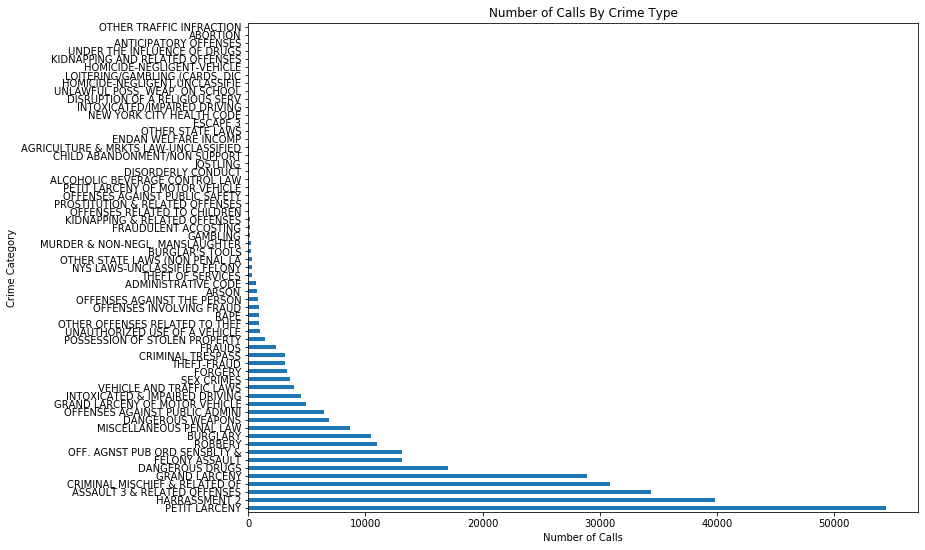

In [18]:
ax = calls['OFNS_DESC'].value_counts().plot(kind='barh')
ax.set_ylabel("Crime Category")
ax.set_xlabel("Number of Calls")
ax.set_title("Number of Calls By Crime Type");

Turns out that for most of the crime categories, number of calls are near 0. These categories can be safely disregarded for our further analysis. Removing these categories will also give us a much nicer plot.

## Question 2b

Create a dataframe `calls_subset` which has only data from `calls` belonging to the top 20 crime categories. You can use any method you want. One way is specified in the hint below

Hint: First create a list of strings containing top 20 crime types. Then subset `calls` using `isin()` function.

In [19]:
Top_crimes = calls['OFNS_DESC'].value_counts().head(20).index.tolist()

calls_subset = calls[calls['OFNS_DESC'].isin(Top_crimes)]
#calls_subset
# YOUR CODE HERE
#raise NotImplementedError()


In [20]:
# TEST
assert isinstance(calls_subset,pd.DataFrame)


Now let us plot the data from `calls_subset`

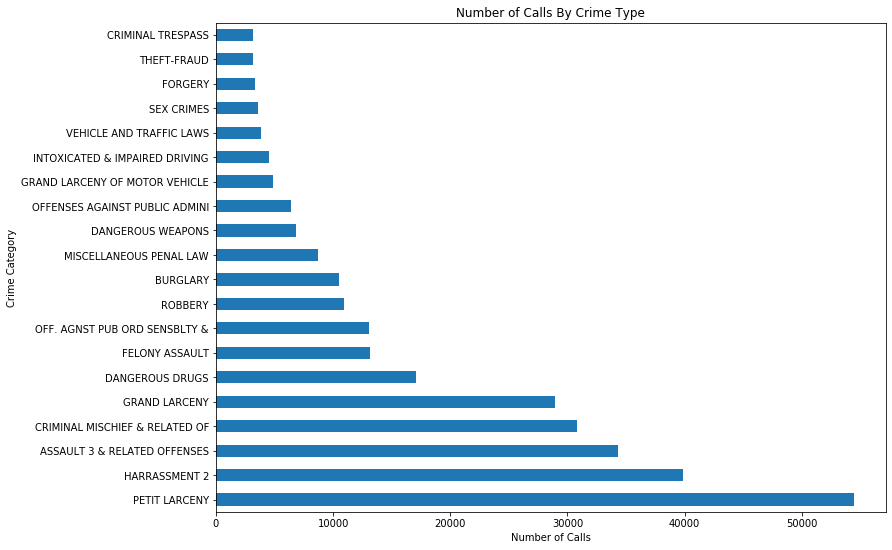

In [21]:
ax = calls_subset['OFNS_DESC'].value_counts().plot(kind='barh')
ax.set_ylabel("Crime Category")
ax.set_xlabel("Number of Calls")
ax.set_title("Number of Calls By Crime Type");

By contrast, the Seaborn library provides a specific function `countplot` built for plotting counts. It operates directly on the DataFrame itself i.e. there's no need to call `value_counts()` at all. This higher level approach makes it easier to work with. Run the cell below, and you'll see that the plot is much prettier (albeit in a weird order).

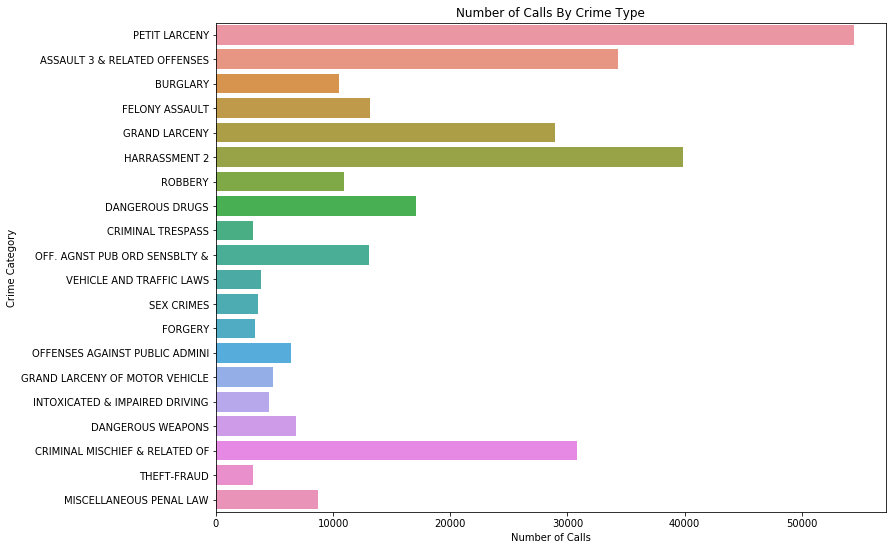

In [22]:
ax = sns.countplot(data=calls_subset, y="OFNS_DESC")
ax.set_ylabel("Crime Category")
ax.set_xlabel("Number of Calls")
ax.set_title("Number of Calls By Crime Type");

If we want the same ordering that we had in the pandas plot, we can use the order parameter of the `countplot` method. It takes a list of strings corresponding to the axis to be ordered. By passing the index of the `value_counts`, we get the order we want.

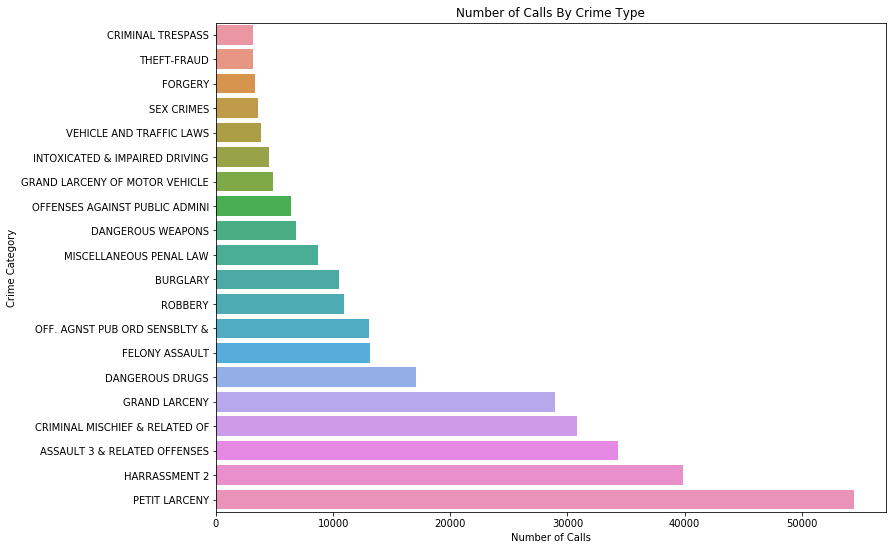

In [23]:
ax = sns.countplot(data=calls_subset, y="OFNS_DESC", order=calls_subset["OFNS_DESC"].value_counts(ascending=True).index);
ax.set_ylabel("Crime Category")
ax.set_xlabel("Number of Calls")
ax.set_title("Number of Calls By Crime Type");

Voilà! Now we have a pretty bar plot with the bars ordered by size. Though `seaborn` appears to provide a superior plot from a aesthetic point of view, the `pandas` plotting library is also good to understand. You'll get practice using both libraries in the following questions.

## An Additional Note on Plotting in Jupyter Notebooks

You may have noticed that many of our code cells involving plotting end with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. Try adding this to your own code in the following questions!

## Question 3

Now it is your turn to make some plots using `pandas` and `seaborn`. Let's start by looking at the distribution of calls over months of the year.

The `CMPLNT_FR_DT` field isn't named helpfully and it is hard to see the meaning from the data alone. `CMPLNT_FR_DT` is actually indicating the date that events happened. We can extract the month from this date. We have given the code below that extracts the month from `CMPLNT_FR_DT` and creates a new column `month_extract`. Notice that in `month_extract`, 0 represents 'month not available', '1' represents 'January',...., '12' represents 'December.

In [24]:
def get_month(string):
    return int(string.split('/')[0])

calls['month_extract'] = calls['CMPLNT_FR_DT'].fillna('0/0/0000').apply(get_month)

In [25]:
# TEST

assert sorted(list(calls['month_extract'].unique())) == [0,1,2,3,4,5,6,7,8,9,10,11,12]

### Question 3a

Add a new column `Month` into the `calls` table that has the string month (eg. 'January') for the corresponding value in `month_extract`. For example, if the values of `month_extract` are `['2','1','1','0']`, then the 4 values of the `Month` column should be `["February", "January", "January", "NA"]`.
- We have provided you a dictionary called `indices_to_months_dict` that associates numbers with strings. 
- Use the dictionary in the function `convert_to_month` to convert number to string
- Use `apply` on the `month_extract` column with the function `convert_to_month`. 

In [26]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_indices = range(1,13)
indices_to_months_dict = dict(zip(month_indices, months))
indices_to_months_dict.update({0:"NA"})

In [27]:
def convert_to_month(some_number):
    return indices_to_months_dict[some_number]
# YOUR CODE HERE
#raise NotImplementedError()

calls["Month"] = calls['month_extract'].apply(convert_to_month)

# YOUR CODE HERE
#raise NotImplementedError()

In [28]:
# TEST
assert set(calls["Month"]) == {"January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "NA"}


### Question 3b

Run the cell below to create a `seaborn` plot. This plot shows the number of calls for each month of the year. Notice the use of the `rotation` argument in `ax.set_xticklabels`, which rotates the labels by 90 degrees.

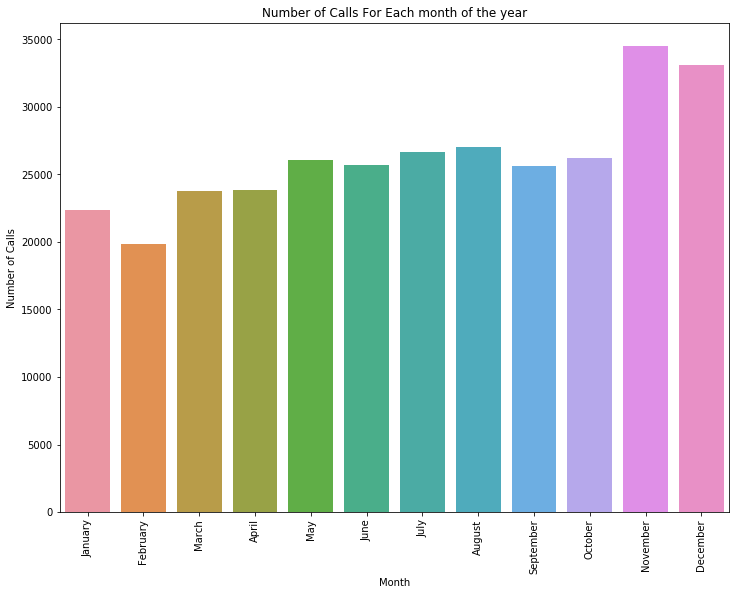

In [29]:
ax = sns.countplot(data=calls, x='Month', order=months)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls For Each month of the year");

Now, let's make the same plot using `pandas`. Construct a vertical bar plot with the count of the number of calls (entries in the table) for each month of the year **ordered by the month of the year** (eg. `January`, `February`, ..., `December`, `NA`). Do not use `sns` for this plot. Be sure that your axes are labeled and that your plot is titled.

**Hint:** *Given a series `s`, and an array `coolIndex` that has the same entries as in `s.index`, `s[coolIndex]` will return a copy of the series in the same order as `coolIndex`.*

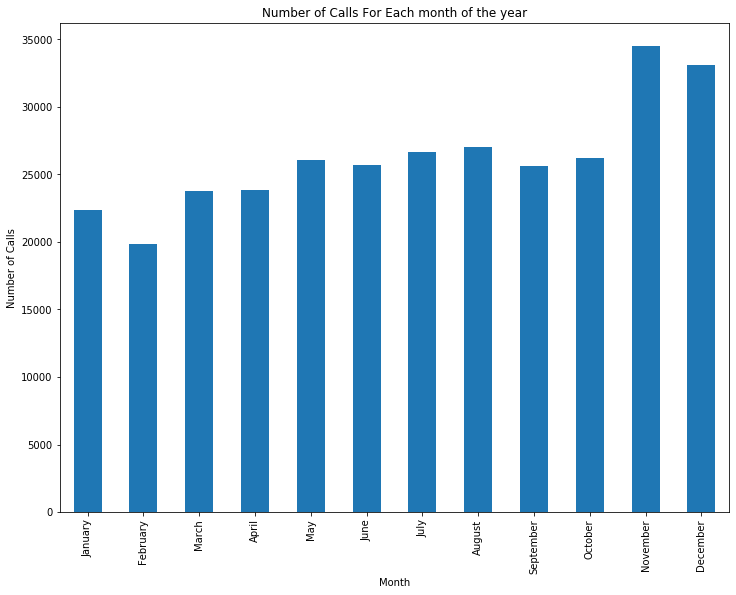

In [32]:
# YOUR CODE HERE
#raise NotImplementedError()
coolIndex = ["January", 
             "February", 
             "March", 
             "April", 
             "May", 
             "June", 
             "July", 
             "August", 
             "September", 
             "October", 
             "November", 
             "December"]
indexNames = calls[calls['Month'] == 'NA'].index

calls.drop(indexNames, inplace = True)

ax = calls["Month"].value_counts().reindex(coolIndex).plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Number of Calls")
ax.set_xlabel("Month")
ax.set_title("Number of Calls For Each month of the year");
ax
# Leave for grading purposes
ax_3b = plt.gca()

In [33]:
# TEST
assert "ax_3b" in locals()
assert np.alltrue(np.array([l.get_text() for l in ax_3b.xaxis.get_ticklabels()]) == months)


## Question 4

It seems last two months generally have slightly more calls than rest of year.  

We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the `OFNS_DESC` "BURGLARY".

### Question 4a

This time, use `seaborn` to create a vertical bar plot of the number of total robberies reported on each month of the year, again ordered by the months of the year starting with January. Do not use `pandas` to plot.

You can use the code for the seaborn plot in Question 3b as a starting point.


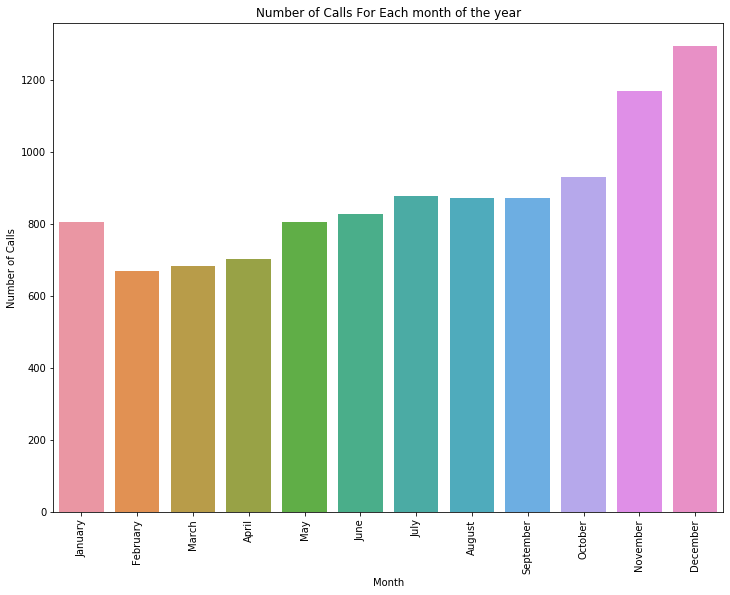

In [35]:
# YOUR CODE HERE
#raise NotImplementedError()
fuck = calls.loc[calls['OFNS_DESC']== 'BURGLARY']

ax = sns.countplot(data=fuck, x='Month', order=months)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls For Each month of the year");

# Leave this for grading purposes
ax_4a = plt.gca()

In [36]:
# TEST
assert "ax_4a" in locals()
assert np.alltrue(np.array([l.get_text() for l in ax_4a.xaxis.get_ticklabels()]) == months)


### Question 4b

Do you realize anything interesting about the distribution of BURGLARY calls over a year? Type a 1-sentence answer in the cell below.

From my experience wathcing the movie home alone and home alone 2 I can can tell that during the holiday season, October - December the number of burglaries increases, this is verified from studying the visual above, the number of burglary calls increase in these months because of travel, external for alternative income and increased suuply of high cost goods.

## Question 5

Let's look at a similar distribution but for crime rates in different boroughs. In the cell below, create the same plot as you did in Question 4, but now looking at instances of the `OFNS_DESC` "ROBBERY" distributed according to the variable "BORO_NM". Use either `pandas` or `seaborn` plotting as you desire.


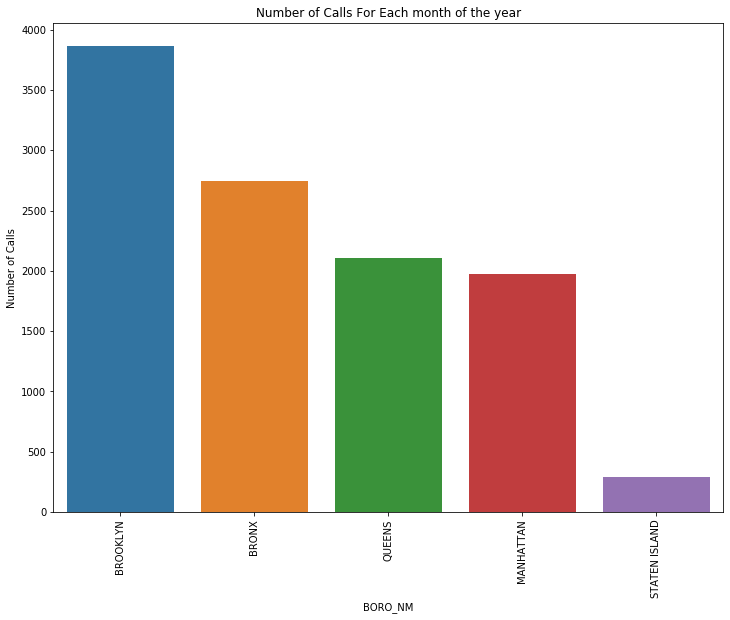

In [40]:
# YOUR CODE HERE
#raise NotImplementedError()
boro = calls.loc[calls['OFNS_DESC']== 'ROBBERY']

ax = sns.countplot(data=boro, x='BORO_NM')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls For Each month of the year");

# Leave this for grading purposes
ax_5 = plt.gca()

In [41]:
# TEST
assert "ax_5" in locals()
assert np.alltrue(np.array([l.get_text() for l in ax_5.xaxis.get_ticklabels()]) == ['BROOKLYN','BRONX','QUEENS','MANHATTAN','STATEN ISLAND'])


## Question 6

### Question 6a

Now let's look at the `CMPLNT_FR_TM` column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe. 

Note that each element in `calls["CMPLNT_FR_TM"]` is a string. So you need to save the hour as an `int`. 

- Complete the function `get_hour` 
  * Use the method `split(":")` to break the string into a list
  * Select the 0th entry 
  * Convert from string to integer using `int`
- Use `apply` on the `CMPLNT_FR_TM` column with the function `get_hour`


In [42]:
def get_hour(some_string):
    return int(some_string.split(':')[0])
    # YOUR CODE HERE
    #raise NotImplementedError()

calls["Hour"] = calls['CMPLNT_FR_TM'].apply(get_hour)

# YOUR CODE HERE
#raise NotImplementedError()

In [43]:
# TEST
'Hour' in calls.columns


True

In [44]:
# TEST
set(calls["Hour"]) == set(range(24))


True

Plot the frequency of each hour in the table (i.e., `value_counts()`) sorted by the hour of the day (i.e., `sort_index()`).
The code in the cell below creates a pandas bar plot showing the number of Robberies committed at each hour of the day.

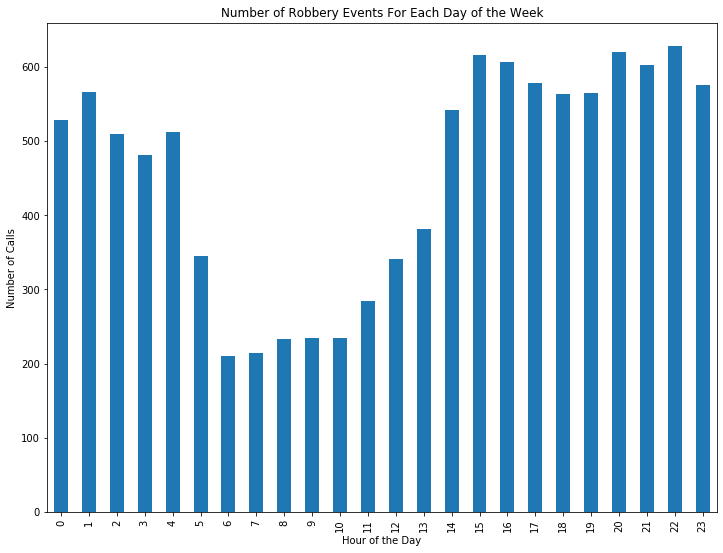

In [45]:
ax = calls[calls["OFNS_DESC"] == "ROBBERY"]['Hour'].value_counts().sort_index().plot(kind='bar')
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Robbery Events For Each Day of the Week");

The cell below contains a seaborn plot of the same data.

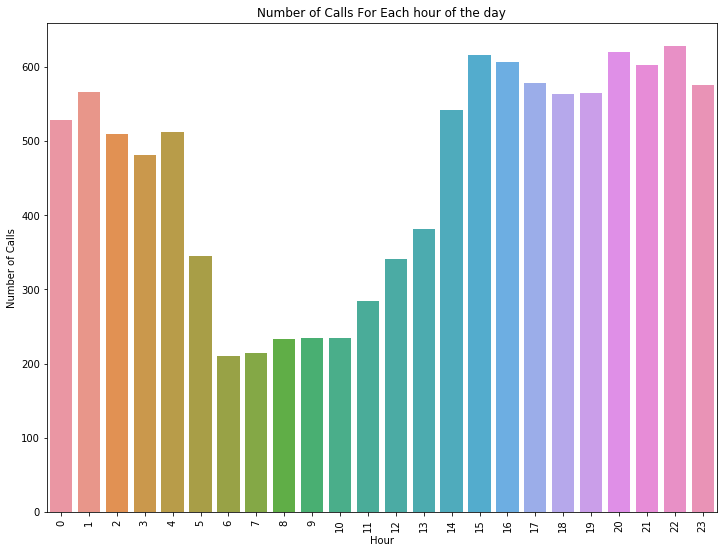

In [49]:
# YOUR CODE HERE
#raise NotImplementedError()
wet_bandits = calls[calls["OFNS_DESC"] == "ROBBERY"]
ax = sns.countplot(data=wet_bandits, x='Hour')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls For Each hour of the day");

Alternatively we could have used 

```python
sns.countplot(data=calls[calls["OFNS_DESC"] == "ROBBERY"], x = 'Hour')
```

### Question 6b

According to our plots, there seems to be a dip in robberies during the day (6 am - 12 pm). Do you trust that this dip is legitimate, or could there be an issue with our data? Explain your reasoning in 1-2 sentences in the cell below.

This is a more active time of the day, people are awaking for work, school, etc. Since this is an active time and light wll start, robbers may avoid this time of the day. Also when people leave the house they will not return until after 12 and have the chance to call the police about a robbery, this may be an example of reporting error since th homeowners can not report an incident until they discover it.

## Question 7


In the cell below, we generate a boxplot which examines the hour of day of each crime broken down by the `OFNS_DESC` value for the `calls_subset` DataFrame.  To construct this plot we used the [DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) documentation.

/opt/conda/envs/dsua-112/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


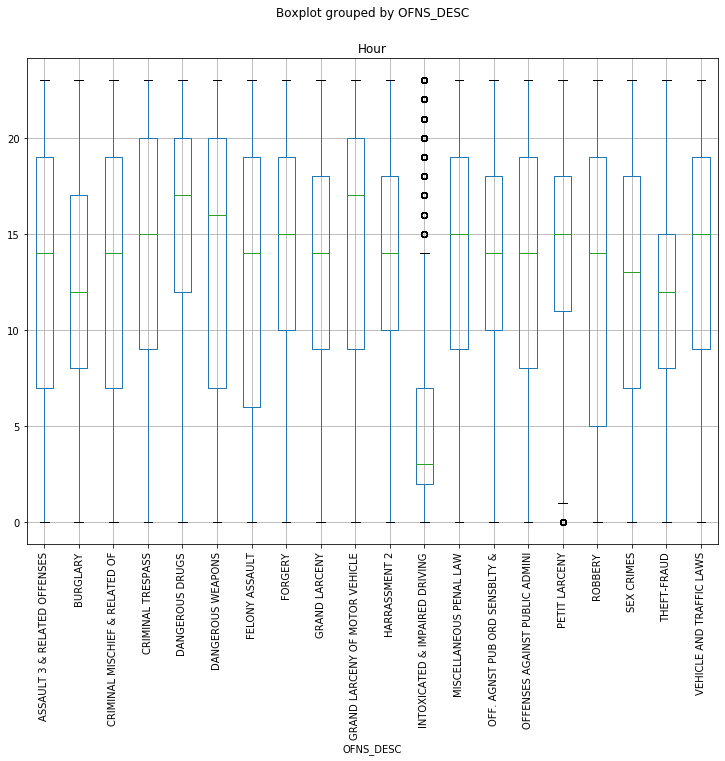

In [50]:
calls_subset["Hour"] = calls_subset["CMPLNT_FR_TM"].apply(get_hour)

calls_subset.boxplot(column="Hour", by='OFNS_DESC', rot=90);

While the pandas boxplot is informative, we can use seaborn to create a more visually-appealing plot. Using seaborn, regenerate a better box plot. The new box plot should be similar to the above diagram. THe order of the labels on x axis need not matter. But the data needs to be represented in the same way. See the [seaborn boxplot documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Looking at your plot, which crime type appears to have the largest interquartile range? Put your results into `answer7` as a string.


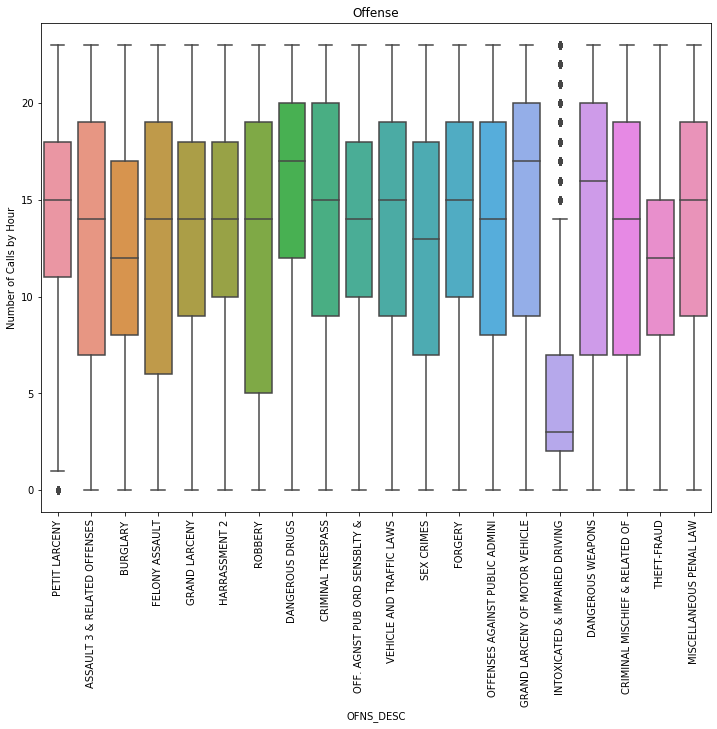

In [52]:
ax = sns.boxplot(x = 'OFNS_DESC', y = 'Hour', data = calls_subset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Number of Calls by Hour")
ax.set_title("Offense");

In [53]:
answer7 = 'ROBBERY'

# Todo: Make a boxplot with seaborn
# YOUR CODE HERE
#raise NotImplementedError()

In [54]:
# TEST
assert isinstance(answer7,str)


## Congratulations

Congrats! You are finished with this assignment.